# ARIMA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/tesla_2018_data (2).csv')

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


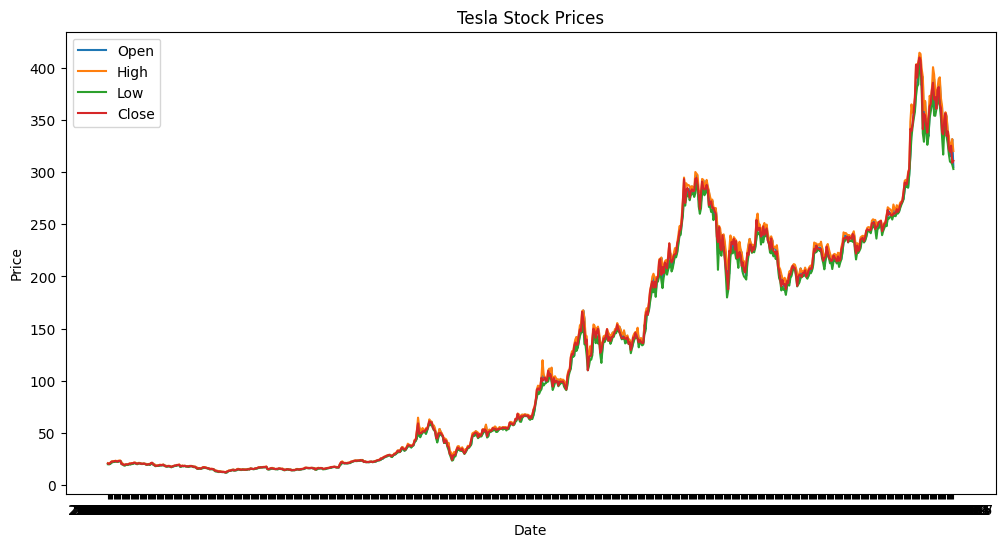

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.plot(data['Date'], data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices')
plt.legend()
plt.show()


The above fig shows data is non-staionaray bcz its show seasonality and upward trend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
sns.set_theme(style='darkgrid',palette='rainbow')
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['figure.figsize'] = (15,10)
from tqdm import tqdm
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/tesla_2018_data (2).csv',index_col=0,parse_dates=True)
df = data[['Adj Close']].values

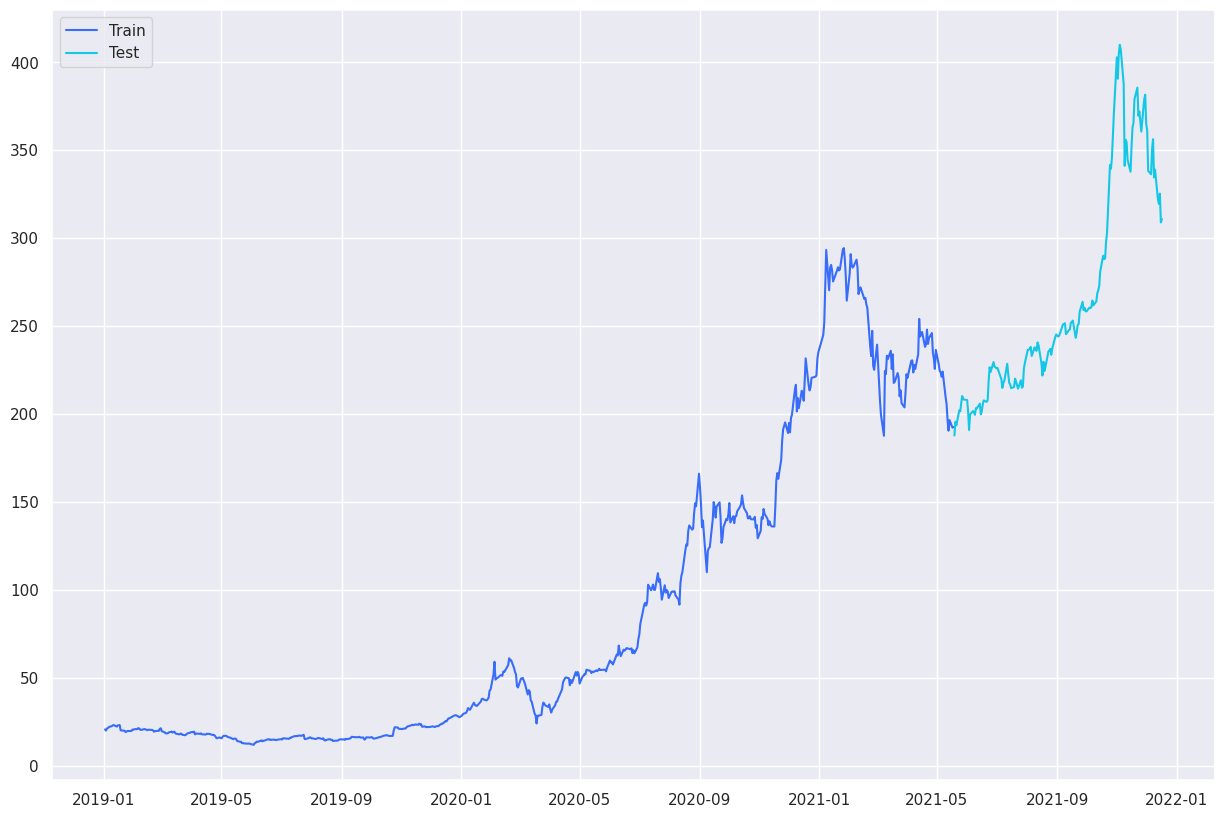

In [ ]:
plt.plot(data[:int(len(df) * 0.8)+1]['Adj Close'],label='Train')
plt.plot(data[int(len(df) * 0.8)+1:]['Adj Close'],label='Test')
plt.legend()
plt.show()

In [ ]:
# split in test train
row = int(len(df) * 0.8)+1
train = list(df[:row])
test = list(df[row:])
# Train and Predict
n_forcast = len(test) # num forecasts to make
model_pred = [] # to hold predictions
for i in tqdm(range(n_forcast)):
    model = ARIMA(train,order=(2, 1, 2))
    model_fit = model.fit() # fit the model on data
    out = model_fit.forecast() # forecast
    model_pred.append(out)
    actual = test[i]
    train.append(actual) # update the train window

  0%|          | 0/149 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
  1%|▏         | 2/149 [00:01<01:25,  1.73it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|▏         | 3/149 [00:01<01:35,  1.53it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

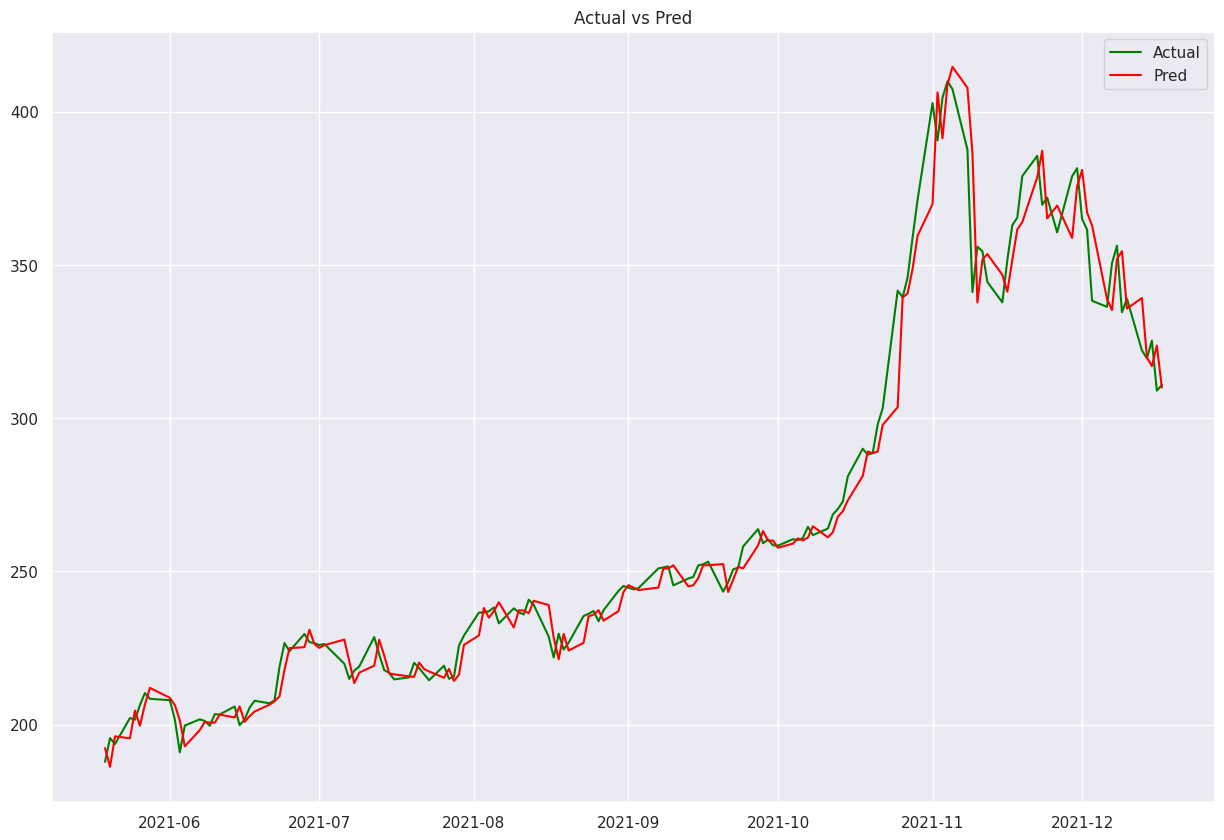

In [ ]:
index_date = data[row:].index
plt.plot(index_date,test,color='green',label='Actual')
plt.plot(index_date,model_pred,color='red',label='Pred')
plt.title('Actual vs Pred')
plt.legend()
plt.show()

In [ ]:

model_pred_values = [pred[0] for pred in model_pred]


mse = np.mean((np.array(test) - np.array(model_pred_values))**2)


rmse = np.sqrt(mse)


mae = np.mean(np.abs(np.array(test) - np.array(model_pred_values)))


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 7319.548363104352
Root Mean Squared Error (RMSE): 85.55435911222965
Mean Absolute Error (MAE): 65.55291272636772


# Future Forecasting

In [ ]:
# Train the ARIMA model on the entire dataset
model = ARIMA(df, order=(2, 1, 2))
model_fit = model.fit()
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecasted values for the next 5 days:", forecast)


Forecasted values for the next 5 days: [313.17801421 315.39449669 316.08692528 314.82567515 312.43683876]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ACTUAL Values

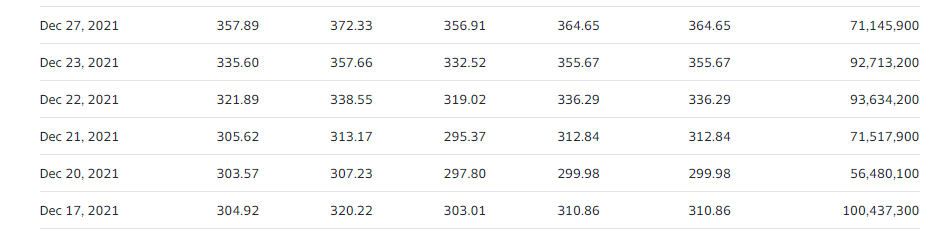

Find P,D,Q values

In [ ]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' contains your entire dataset

# Define the range of p, d, q values to search
p_values = range(0, 5)  # Example: 0 to 4
d_values = range(0, 2)  # Example: 0 to 1
q_values = range(0, 5)  # Example: 0 to 4

# Generate all possible combinations of p, d, q values
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to track the best values
best_aic = float('inf')  # Initialize with a high value
best_pdq = None

# Iterate through all combinations and fit ARIMA models
for pdq in pdq_combinations:
    try:
        model = ARIMA(df, order=pdq)
        model_fit = model.fit()
        current_aic = model_fit.aic
        if current_aic < best_aic:
            best_aic = current_aic
            best_pdq = pdq
    except:
        continue

# Print the best PDQ value found
print("Best PDQ:", best_pdq)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best PDQ: (2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SVM